# **IMPORT LIBRARIES**

In [1]:
import pandas as pd
import re # for removing punctuation
import nltk
from nltk.corpus import stopwords # stop words
nltk.download('stopwords')
from nltk.tokenize import word_tokenize # tokenizing word
from nltk.stem import PorterStemmer # stemming
from sklearn.feature_extraction.text import TfidfVectorizer # TF-IDF
from sklearn.model_selection import train_test_split # train/test split dataset
# SVM model
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
# Graph
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **LOADING DATASET**

In [2]:
# Load dataset from train.csv
data = pd.read_csv('./dataset/Covid_19.csv')

In [3]:
data.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


## **Summary of the dataset**

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10700 entries, 0 to 10699
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      10700 non-null  int64 
 1   tweet   10700 non-null  object
 2   label   10700 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.9+ KB


In [5]:
data.value_counts('label')

label
real    5600
fake    5100
Name: count, dtype: int64

In [6]:
data.shape

(10700, 3)

# **DATA PREPROCESSING**

## **DROP UNNECESSARY COLUMN**

In [7]:
data = data.drop(columns=['id'], axis=1)

In [8]:
data.head()

,tweet,label
0,The CDC currently reports 99031 deaths. In gen...,real
1,States reported 1121 deaths a small rise from ...,real
2,Politically Correct Woman (Almost) Uses Pandem...,fake
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,Populous states can generate large case counts...,real


In [9]:
data.isna().sum()

tweet    0
label    0
dtype: int64

## **CONVERTING TO LOWERCASE, TOKENIZE, REMOVING PUNCTUATION AND STEMMING DATA**

In [10]:
# print all the stopwords/punctuation
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [11]:
sw = stopwords.words("english")

porter_stemmer = PorterStemmer()

def data_processing(input_data):
    # Convert to lowercase
    input_data = input_data.lower()
    # Remove punctuation/non-alphanumeric characters
    input_data = re.sub(r'[^\w\s]', ' ', input_data)
    # Tokenize data
    tokenize_data = word_tokenize(input_data) 
    # Remove stop words
    removed_data = [w for w in tokenize_data if w not in sw]
    # Stemming word
    stem_data = [porter_stemmer.stem(w) for w in removed_data] 
    # join token text back into string
    output_data = " ".join(stem_data)
    return output_data

In [12]:
data['final_tweet'] = data['tweet'].apply(data_processing)

In [13]:
data.head(20)

,tweet,label,final_tweet
0,The CDC currently reports 99031 deaths. In gen...,real,cdc current report 99031 death gener discrep d...
1,States reported 1121 deaths a small rise from ...,real,state report 1121 death small rise last tuesda...
2,Politically Correct Woman (Almost) Uses Pandem...,fake,polit correct woman almost use pandem excus re...
3,#IndiaFightsCorona: We have 1524 #COVID testin...,real,indiafightscorona 1524 covid test laboratori i...
4,Populous states can generate large case counts...,real,popul state gener larg case count look new cas...
5,"Covid Act Now found ""on average each person in...",real,covid act found averag person illinoi covid 19...
6,If you tested positive for #COVID19 and have n...,real,test posit covid19 symptom stay home away peop...
7,Obama Calls Trump’s Coronavirus Response A Cha...,fake,obama call trump coronaviru respons chaotic di...
8,"???Clearly, the Obama administration did not l...",fake,clearli obama administr leav kind game plan so...
9,Retraction—Hydroxychloroquine or chloroquine w...,fake,retract hydroxychloroquin chloroquin without m...


In [14]:
# Drop unnecessary column
data = data.drop(columns=['tweet'], axis=1)

In [15]:
data.head(20)

,label,final_tweet
0,real,cdc current report 99031 death gener discrep d...
1,real,state report 1121 death small rise last tuesda...
2,fake,polit correct woman almost use pandem excus re...
3,real,indiafightscorona 1524 covid test laboratori i...
4,real,popul state gener larg case count look new cas...
5,real,covid act found averag person illinoi covid 19...
6,real,test posit covid19 symptom stay home away peop...
7,fake,obama call trump coronaviru respons chaotic di...
8,fake,clearli obama administr leav kind game plan so...
9,fake,retract hydroxychloroquin chloroquin without m...


## **SEPARATING CONTENT/LABEL**

In [16]:
X = data['final_tweet'].values
Y = data['label'].values

In [17]:
print(X)
print(Y)

['cdc current report 99031 death gener discrep death count differ sourc small explic death toll stand roughli 100000 peopl today'
 'state report 1121 death small rise last tuesday southern state report 640 death http co yasgrtt4ux'
 'polit correct woman almost use pandem excus reus plastic bag http co thf8gunfp coronaviru nashvil'
 ...
 '296 new case covid19nigeria plateau 85 enugu 46 oyo 31 lago 21 river 20 fct 15 kaduna 13 bauchi 12 delta 11 ekiti 11 akwa ibom 7 ebonyi 6 kwara 5 ogun 4 osun 4 gomb 3 niger 2 53317 confirm 40726 discharg 1011 death http co 7vlnb37mw1'
 'rt cdcemerg dyk cdcgov one stop shop covid19 resourc section commun peopl age 15 21 find'
 'half pregnant women recent admit uk hospit covid 19 infect black ethnic minor group bmj studi find http co rypbgsnael']
['real' 'real' 'fake' ... 'real' 'real' 'real']


In [18]:
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(X)

## **SPLITTING THE DATASET INTO TRAINING & TEST**

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state=3)

In [20]:
X_train

array(['fox news town hall presid trump said china worst year 67 year coronaviru pandem rate similar claim mostli fals http co igmacydydv http co ni2bssq3jg',
       'new may notic new set phone track covid 19 unauthor surveil plot one popular social media rumor suggest http co c2ytwok7it http co nfa5yuxabi',
       'nice approv encorafenib cetuximab treat braf v600e mcrc http co ho7ypjllun',
       ...,
       'coronavirusupd state wise detail total confirm covid19 case till 18 septemb 2020 8 state 1 20000 confirm case state 20001 120000 confirm case state 120000 confirm case total confirm case far staysaf http co epyabyxrj',
       'report outbreak idioci spread 10 000 time faster coronaviru coronoviru http co yapqkvdncj http co dbv5bhqcp8',
       'one strongest border system world peopl come home requir stay isol quarantin 14 day remain key part border measur'],
      dtype=object)

In [21]:
X_test

array(['break trump announc u offici leav world health organ middl pandem current coordin intern vaccin drug trial fight covid19 http co utipdjdhy covid19 coronaviru coronavirusupd',
       'break batman get covid 19 wear mask cover mouth',
       '65 older higher risk get serious ill coronaviru learn take step protect slow spread http co ih2irfg300 covid19 http co notgr6ctrm',
       ...,
       'indiafightscorona assess covid prevent estim decis lockdown slow progress pandem india prevent 14 29 lakh case 37 78 thousand death detail http co lz6cp3icfg staysaf indiawillwin http co qxmtdm9wiq',
       'new guidelin recommend encourag children four masturb',
       'final indian student pondicherri univers name ramu found home remedi cure covid 19 first time accept prove ad 1 tablespoon black pepper powder 2 tabl spoon honey ginger juic consecut 5 day would suppress effect corona eventu go away 100 entir world start accept remedi final good news 2020 pleas circul inform famili member fri

## **APPLY TF-IDF**

In [22]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

In [42]:
print(X_train)

  (0, 2105)	0.2515856344556419
  (0, 4645)	0.1656897186875163
  (0, 4742)	0.14050458501624274
  (0, 4833)	0.11236656160947148
  (0, 5089)	0.08262054021033971
  (0, 6624)	0.19548619175719884
  (0, 6936)	0.25452931260608097
  (0, 7623)	0.2698204018764472
  (0, 8006)	0.11231411728652743
  (0, 8206)	0.3122025719514993
  (0, 10377)	0.265302907079033
  (0, 10717)	0.15606862835596616
  (0, 10763)	0.3122025719514993
  (0, 11433)	0.1364260276046991
  (0, 11963)	0.15831908669757466
  (0, 12453)	0.1441867050997481
  (0, 13058)	0.1615077402628641
  (0, 13467)	0.2229207370039809
  (0, 14579)	0.25452931260608097
  (0, 14668)	0.14478128906786575
  (0, 15818)	0.23107948016984778
  (0, 16122)	0.335509242550581
  (1, 604)	0.08369169652653052
  (1, 4287)	0.2993604902606114
  (1, 4833)	0.11649451024700029
  :	:
  (7488, 8006)	0.14543688733620097
  (7488, 8180)	0.3641338624011087
  (7488, 11283)	0.21122479002916633
  (7488, 12646)	0.13408759269924445
  (7488, 13749)	0.18433246492974423
  (7488, 14455)	0.17

In [38]:
print(X_test)

  (0, 3266)	0.21177509084381874
  (0, 4117)	0.24191216482516759
  (0, 4833)	0.06990431928656247
  (0, 5061)	0.30363487841655684
  (0, 5089)	0.10279806625328004
  (0, 5100)	0.19195162539420774
  (0, 5168)	0.21367224550468017
  (0, 5326)	0.20119648050361236
  (0, 5976)	0.24322768213203996
  (0, 6759)	0.23939839544851382
  (0, 7719)	0.1611277706314055
  (0, 8006)	0.06987169316858452
  (0, 8483)	0.26234870734845867
  (0, 9449)	0.2691896374129386
  (0, 10167)	0.2875135366072167
  (0, 11095)	0.24744050794079578
  (0, 11235)	0.23012777166504422
  (0, 11433)	0.1697438892153911
  (0, 14642)	0.2353310697077915
  (0, 14668)	0.1801396663341008
  (0, 15189)	0.16606187911395368
  (0, 15801)	0.19059052808529578
  (1, 604)	0.14515690452324317
  (1, 3745)	0.5613841818462654
  (1, 4117)	0.3496105163545271
  :	:
  (3209, 7902)	0.09398401949629853
  (3209, 7919)	0.16737858632010955
  (3209, 8354)	0.11329083039272733
  (3209, 8403)	0.1151048300863647
  (3209, 8895)	0.17113232034811332
  (3209, 10073)	0.120

# **BUILDING MODEL SUPPORT VECTOR MACHINES**

In [23]:
svm_model = SVC(kernel='linear', C=1, probability=True)
svm_model.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)

In [24]:
prediction = svm_model.predict(X_test)

In [25]:
print(prediction)

['fake' 'fake' 'real' ... 'real' 'fake' 'fake']


In [26]:
df = pd.DataFrame(prediction)
df[0].value_counts()

0
real    1730
fake    1480
Name: count, dtype: int64

In [27]:
svm_model.score(X_train, Y_train)

0.991588785046729

In [28]:
svm_model.score(X_test, Y_test)

0.9411214953271028

In [29]:
# con_matrix = confusion_matrix(prediction, Y_test)
# # con_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=[False, True])
# con_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=svm_model.classes_)

# con_matrix_display.plot()
# plt.show()


Text(0.5, 23.52222222222222, 'Predicted label')

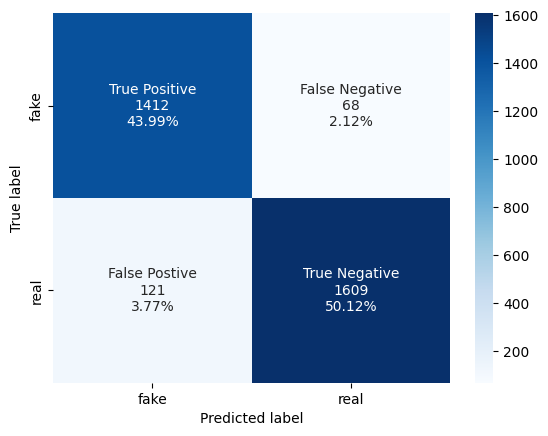

In [30]:
con_matrix = confusion_matrix(prediction, Y_test)
con_matrix_display = metrics.ConfusionMatrixDisplay(confusion_matrix=con_matrix, display_labels=svm_model.classes_)
group_names = ['True Positive', 'False Negative', 'False Postive','True Negative']
categories = ['fake', 'real']
group_counts = ['{0:0.0f}'.format(value) for value in con_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in con_matrix.flatten()/np.sum(con_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(con_matrix, annot=labels, fmt='', xticklabels=categories, yticklabels=categories, cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [31]:
accuracy = accuracy_score(prediction, Y_test)
precision = precision_score(prediction, Y_test, average='macro')
recall = recall_score(prediction, Y_test, average='macro')
F1_sc = f1_score(prediction, Y_test, average='macro')

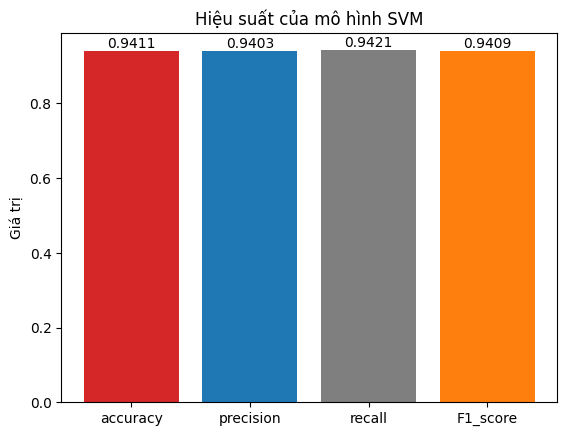

In [32]:
fig, ax = plt.subplots()

title = ['accuracy', 'precision', 'recall', 'F1_score']
values = [accuracy, precision, recall, F1_sc]
bar_colors = ['tab:red', 'tab:blue', 'tab:gray', 'tab:orange']

bars = ax.bar(title, values, color=bar_colors)
ax.bar_label(bars, fmt='%.4f')

ax.set_ylabel('Giá trị')
ax.set_title('Hiệu suất của mô hình SVM')

plt.show()